<a href="https://colab.research.google.com/github/KumariAnjaliRout/netflix-user-behavior-analysis/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("netflix_titles.csv")

# Show the first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Kirsten Johnson,United States,September 25,2020,2020,PG-13,89 min,Documentaries,In this inventive portrait
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,May 20,2020,2020,TV-MA,1 Season,International TV Shows,A South African teen


In [3]:
print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (2, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, s1 to s2
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2 non-null      object
 1   type          2 non-null      object
 2   title         1 non-null      object
 3   director      2 non-null      object
 4   cast          2 non-null      object
 5   country       2 non-null      object
 6   date_added    2 non-null      int64 
 7   release_year  2 non-null      int64 
 8   rating        2 non-null      object
 9   duration      2 non-null      object
 10  listed_in     2 non-null      object
 11  description   2 non-null      object
dtypes: int64(2), object(10)
memory usage: 316.0+ bytes


In [4]:
df.isnull().sum()



,0
show_id,0
type,0
title,1
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [5]:
df_cleaned = df.dropna(subset=['director', 'cast', 'country'])


In [6]:
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])


In [7]:
df_cleaned['year_added'] = df_cleaned['date_added'].dt.year
df_cleaned['month_added'] = df_cleaned['date_added'].dt.month



In [8]:

df_cleaned[['title', 'date_added', 'year_added', 'month_added']].head()


,title,date_added,year_added,month_added
s1,Kirsten Johnson,1970-01-01 00:00:00.000002020,1970,1
s2,NaN,1970-01-01 00:00:00.000002020,1970,1


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# For clean charts
sns.set(style="whitegrid")



<ipython-input-10-7079f8226834>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='type', palette='Set2')


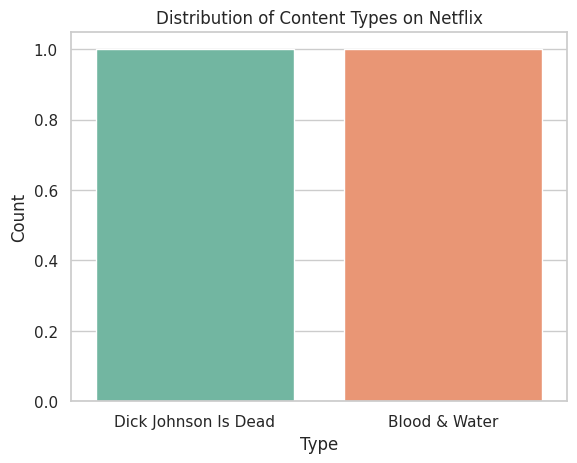

In [10]:
sns.countplot(data=df_cleaned, x='type', palette='Set2')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


<ipython-input-11-b29d013ee1b0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')


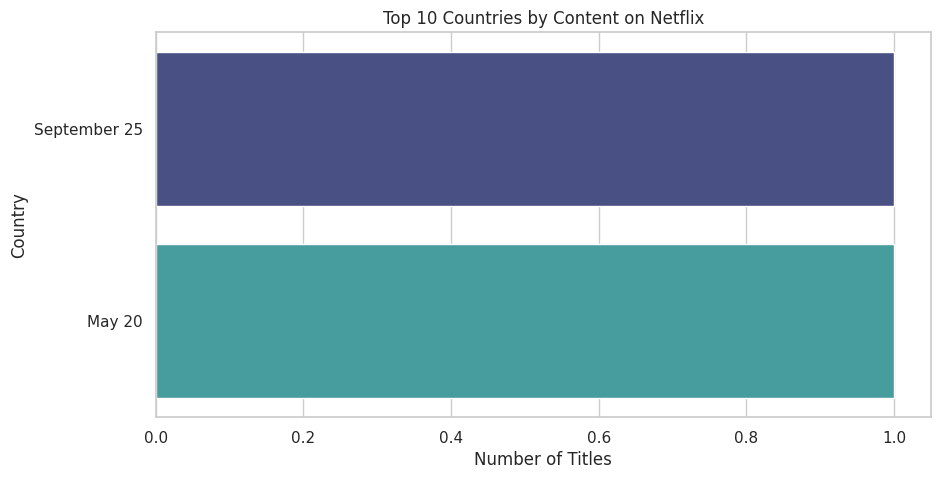

In [11]:
top_countries = df_cleaned['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')
plt.title('Top 10 Countries by Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


<ipython-input-12-6312bad25125>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


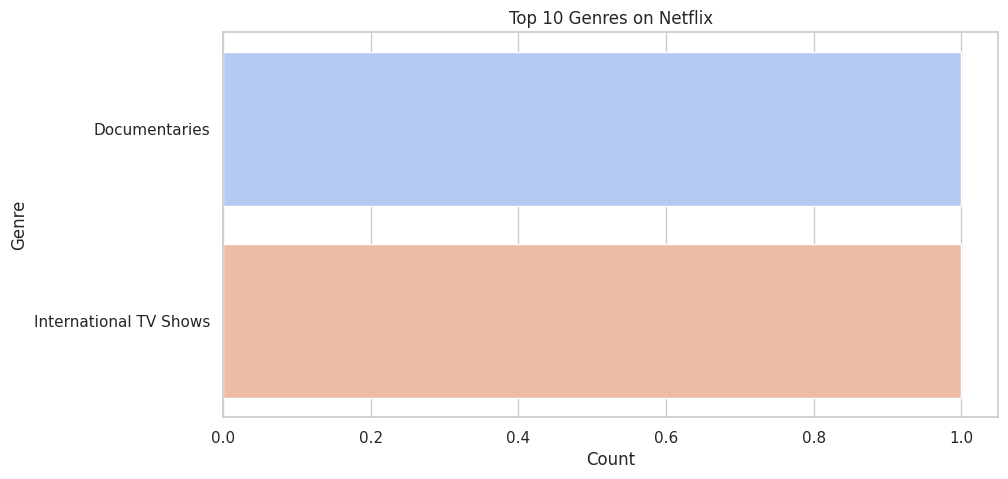

In [12]:
# Split the 'listed_in' column into individual genres
all_genres = df_cleaned['listed_in'].str.split(', ', expand=True).stack()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
